Optimal cuboid dimensions:
  Length (L) = 3200 mm
  Breadth (B) = 2500 mm
  Height (H) = 2500 mm
Brick counts:
  k1 (bricks along L) = 16
  k2 (bricks along B) = 25
  k3 (bricks along H) = 25
Brick orientation (l', b', h'): (200, 100, 100)
Total bricks: 10000

Sample brick positions and orientations:
{'brick_index': 1, 'position': (0, 0, 0), 'orientation': (200, 100, 100)}
{'brick_index': 2, 'position': (0, 0, 100), 'orientation': (200, 100, 100)}
{'brick_index': 3, 'position': (0, 0, 200), 'orientation': (200, 100, 100)}
{'brick_index': 4, 'position': (0, 0, 300), 'orientation': (200, 100, 100)}
{'brick_index': 5, 'position': (0, 0, 400), 'orientation': (200, 100, 100)}
{'brick_index': 6, 'position': (0, 0, 500), 'orientation': (200, 100, 100)}
{'brick_index': 7, 'position': (0, 0, 600), 'orientation': (200, 100, 100)}
{'brick_index': 8, 'position': (0, 0, 700), 'orientation': (200, 100, 100)}
{'brick_index': 9, 'position': (0, 0, 800), 'orientation': (200, 100, 100)}
{'brick_index': 

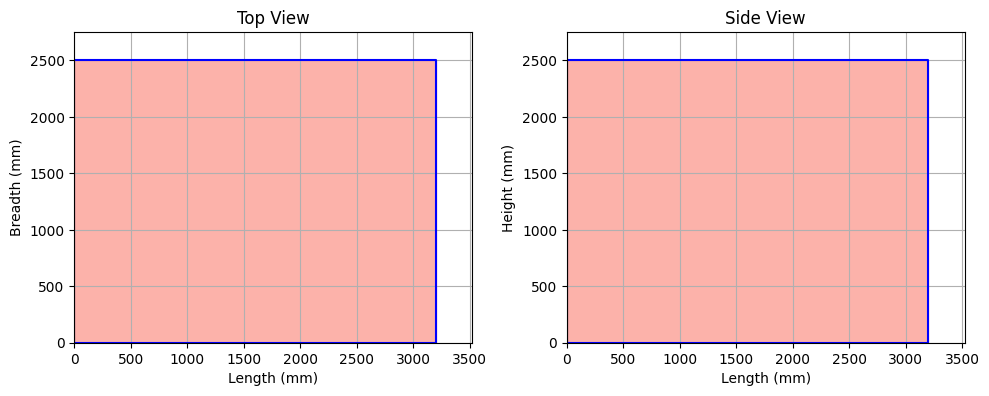

In [2]:
import matplotlib.pyplot as plt
from itertools import permutations

def find_optimal_cuboid_with_rotation(n, l, b, h):
    brick_dims = [l, b, h]
    best_dims = None
    best_diff = float('inf')
    best_k = None
    best_orientation = None
    
    for orientation in set(permutations(brick_dims)):
        l_p, b_p, h_p = orientation
        for k1 in range(1, int(n ** (1/3)) + 1):
            if n % k1 != 0:
                continue
            n2 = n // k1
            for k2 in range(k1, int(n2 ** 0.5) + 1):
                if n2 % k2 != 0:
                    continue
                k3 = n2 // k2
                L1 = k1 * l_p
                L2 = k2 * b_p
                L3 = k3 * h_p
                dims_list = [L1, L2, L3]
                diff = max(dims_list) - min(dims_list)
                if diff < best_diff:
                    best_diff = diff
                    best_dims = (L1, L2, L3)
                    best_k = (k1, k2, k3)
                    best_orientation = orientation
    return best_dims, best_k, best_orientation

def get_bricks_positions_orientations(n, l, b, h):
    (L, B, H), (k1, k2, k3), orientation = find_optimal_cuboid_with_rotation(n, l, b, h)
    l_p, b_p, h_p = orientation
    
    brick_positions = []
    for i in range(k1):
        for j in range(k2):
            for k in range(k3):
                x = i * l_p
                y = j * b_p
                z = k * h_p
                brick_positions.append({
                    'brick_index': i * (k2 * k3) + j * k3 + k + 1,
                    'position': (x, y, z),
                    'orientation': orientation
                })
    return brick_positions, (L, B, H), (k1, k2, k3), orientation

def plot_cuboid_views(L, B, H):
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.title("Top View")
    plt.gca().set_aspect('equal')
    plt.plot([0, L, L, 0, 0], [0, 0, B, B, 0], 'b-')
    plt.fill([0, L, L, 0], [0, 0, B, B], color='salmon', alpha=0.6)
    plt.xlabel("Length (mm)")
    plt.ylabel("Breadth (mm)")
    plt.xlim(0, L * 1.1)
    plt.ylim(0, B * 1.1)
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.title("Side View")
    plt.gca().set_aspect('equal')
    plt.plot([0, L, L, 0, 0], [0, 0, H, H, 0], 'b-')
    plt.fill([0, L, L, 0], [0, 0, H, H], color='salmon', alpha=0.6)
    plt.xlabel("Length (mm)")
    plt.ylabel("Height (mm)")
    plt.xlim(0, L * 1.1)
    plt.ylim(0, H * 1.1)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# MAIN
n = 10000
l = 200
b = 100
h = 100

brick_positions, (L, B, H), (k1, k2, k3), orientation = get_bricks_positions_orientations(n, l, b, h)

print(f"Optimal cuboid dimensions:\n  Length (L) = {L} mm\n  Breadth (B) = {B} mm\n  Height (H) = {H} mm")
print(f"Brick counts:\n  k1 (bricks along L) = {k1}\n  k2 (bricks along B) = {k2}\n  k3 (bricks along H) = {k3}")
print(f"Brick orientation (l', b', h'): {orientation}")
print(f"Total bricks: {len(brick_positions)}")

print("\nSample brick positions and orientations:")
for brick in brick_positions[:50]:
    print(brick)

plot_cuboid_views(L, B, H)
